<a href="https://colab.research.google.com/github/LadyWinterD/binary-classifiers-identify-Numbers-/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

In [0]:
mnist = fetch_openml('mnist_784',version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

70000 images and each image has 784 feaures, this is because each image is 28*28 pixel, from 1 to 255.

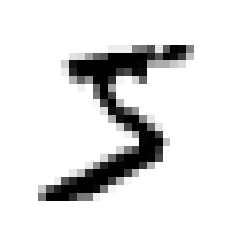

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

it looks like a 5, and the lebel tells the answer

In [10]:
y[0]

'5'

In [0]:
import numpy as np

y = y.astype(np.uint8)

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# training a binary classifier : SGD Classifier

In [0]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test ==5)

In [18]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])


array([ True])

#measuring accuracy using cross-validation

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

96% accracy on all cross-validation folds

In [0]:
from sklearn.base import BaseEstimator
class Never5Classfier(BaseEstimator):
  def fit(self, X, y= None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1),dtype=bool)

In [32]:
never_5_clf=Never5Classfier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

over 90% accuracy. 

# confusion matrix
Cross_val_predict()performs K-fold cross-validation, instead of returning the evaluation scores, it returns the predictions made on each test fold. it means you can get a clean prediction for each instance in the training set.Clean means the prediction is made by a model that never saw the data during training.

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

First row of the matrix considers non-5 images:53892

*   687 were wrongly classified as 5s




*   second row considers the images of 5s

*   1891 were wrongly classified as non-5s
*   3530 were correctly classified as 5s 


In [37]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

precision = TP/(TP + FP)
TP is the number of true positives, and FP is the number of false positives.
FN is, of course, the number of false negatives.

In [38]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)     #687/(3530+687)

0.8370879772350012

In [39]:
recall_score(y_train_5,y_train_pred)  # == 1891/(3530+687)

0.6511713705958311

an image represents a 5, it is correct only 83.7%
moreover, it only detects 65.1% of the 5s
#harmonic mean of precision and recall

In [41]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

#precision/recall trade-off

In [0]:
#decision_function() method, which returns a score for each instance
y_scores = sgd_clf.decision_function([some_digit])

In [59]:
y_scores

array([2164.22030239])

In [0]:
threshold = 0

In [0]:
y_some_digit_pred=(y_scores > threshold)

In [0]:
threshold = 8000

In [0]:
y_some_digit_pred = (y_scores > threshold)

In [63]:
y_some_digit_pred

array([False])

want to return decision scores instead of predictions

In [0]:
y_scores = cross_val_predict(sgd_clf,X_train, y_train_5,cv=3,method="decision_function")

ues precision_recall_curve() to compute precision


In [0]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

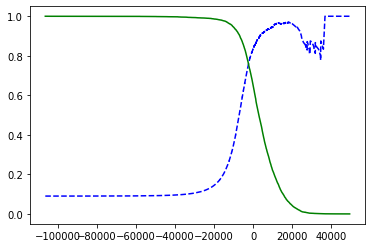

In [68]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  [...] # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

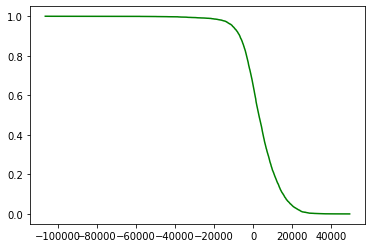

In [73]:
def plot_precision_recall_vs_threshold(recalls, thresholds):
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  [...] # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(recalls, thresholds)
plt.show()

(np.argmax() will give you the
first index of the maximum value, which in this case means the first True value

In [0]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816

In [79]:
np.argmax(precisions >= 0.90)

57075

In [0]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [77]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [78]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

#The ROC Curve
The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plotting
precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate (FPR). The FPR is the ratio of negative instances
that are incorrectly classified as positive. It is equal to 1 – the true negative rate
(TNR), which is the ratio of negative instances that are correctly classified as negative.
The TNR is also called specificity. Hence, the ROC curve plots sensitivity (recall) versus
1 – specificity.

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

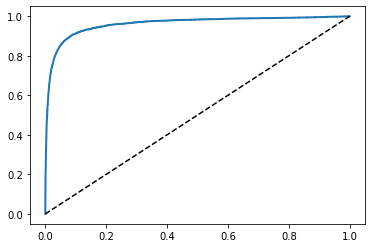

In [83]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
  [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

predict_proba() method returns an array containing a row per
instance and a column per class, each containing the probability that the given
instance belongs to the given class

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

compare its ROC curve and ROC
AUC score to those of the SGDClassifier.

In [0]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

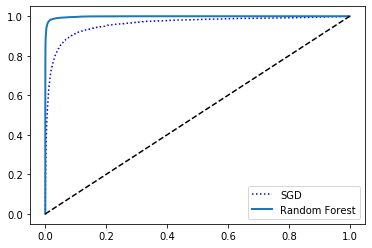

In [88]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [89]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

Try measuring the precision and recall scores: you should find 99.0% precision and
86.6% recall. Not too bad!

#Multiclass Classification
###**Some algorithms**
* SGD classifiers, 
* Random Forest classifiers,
* naive Bayes classifiers, 
###** binary classifiers **
* Logistic Regression 
* Support Vector Machine classifiers
### one way 
to create a system that can classify the digit images into 10 class is train 10 binary classifiers, one foe each digit. then if i want to classify an image, i can get the decision secor from each classifier for that image and you select the class whose classifier outputs the highest score. it is called **ONE-VERSUS-THE REST(OvR) strategy, also called one versus all.**
###another strategy 
is to train a binary classifier for every pair of digits: one to distinguish 0 and 1, another to distinguish 0 and 2, another for 1 and 2 and so on. it is called the **one-versus-one(OvO)strategy. if there are N calsses, you need to train N × (N – 1) / 2 classifiers.   if i need to classify an image, i have to run the image through all 45 classifiers and see which class wins the most duels. the main advantage of OvO is each classifier only need to be trained on the part of the training set for the 2 classes.   

##Support Vector Machine classifier

In [0]:
from sklearn.svm import SVC
svm_clf = SVC()

In [92]:
svm_clf.fit(X_train, y_train) #y_train, not y_train_5


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [0]:
some_digit_scores = svm_clf.decision_function([some_digit]) #call decision_function , can see it retuns 10 scores for per instance

In [95]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [96]:
#the hightest score is class 5
np.argmax(some_digit_scores)

5

In [97]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [99]:
svm_clf.classes_[5]

5

##OvR classifier classes

In [0]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)